### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [275]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans
import seaborn as sb
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage,fcluster

In [145]:
os.chdir("C:\Program Files\AIML PG")
vehicles_df = pd.read_csv("vehicle.csv")

In [146]:
vehicles_df.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [147]:
vehicles_df[vehicles_df.isna()==False].count()

compactness                    846
circularity                    841
distance_circularity           842
radius_ratio                   840
pr.axis_aspect_ratio           844
max.length_aspect_ratio        846
scatter_ratio                  845
elongatedness                  845
pr.axis_rectangularity         843
max.length_rectangularity      846
scaled_variance                843
scaled_variance.1              844
scaled_radius_of_gyration      844
scaled_radius_of_gyration.1    842
skewness_about                 840
skewness_about.1               845
skewness_about.2               845
hollows_ratio                  846
class                          846
dtype: int64

In [148]:
vehicles_df.dropna(inplace = True)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

<BarContainer object of 3 artists>

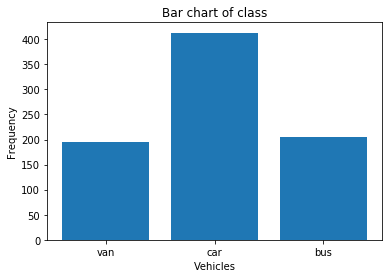

In [149]:
distinct_class = vehicles_df["class"].unique()
class_counts = [vehicles_df["class"][vehicles_df["class"]==x].count() for x in distinct_class]
plt.title("Bar chart of class")
plt.xlabel("Vehicles")
plt.ylabel("Frequency")
plt.bar(x=distinct_class,height=class_counts)

### Check for any missing values in the data 

In [150]:
vehicles_df[vehicles_df.isna()==False].count()

compactness                    813
circularity                    813
distance_circularity           813
radius_ratio                   813
pr.axis_aspect_ratio           813
max.length_aspect_ratio        813
scatter_ratio                  813
elongatedness                  813
pr.axis_rectangularity         813
max.length_rectangularity      813
scaled_variance                813
scaled_variance.1              813
scaled_radius_of_gyration      813
scaled_radius_of_gyration.1    813
skewness_about                 813
skewness_about.1               813
skewness_about.2               813
hollows_ratio                  813
class                          813
dtype: int64

Observation : Before dropping the missing values, the count of each column was different.
After dropping the missing values the count of all the columns is same 813.
This proves that there are no missing values.

### 3. Standardize the data 

In [151]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [152]:
class_col = vehicles_df["class"]
vehicles_df.drop("class",inplace=True,axis=1)
vehicles_df=vehicles_df.apply(zscore)
vehicles_df.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [153]:
vehicles_df.insert(column="class",value=class_col,loc=18)
vehicles_df.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,van
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,van
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,car
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,van
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,bus


In [154]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null float64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null float64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null float64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_rat

### K - Means Clustering

### 4. Plotting Elbow/ Scree Plot

C:\Users\tshrgpt329\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


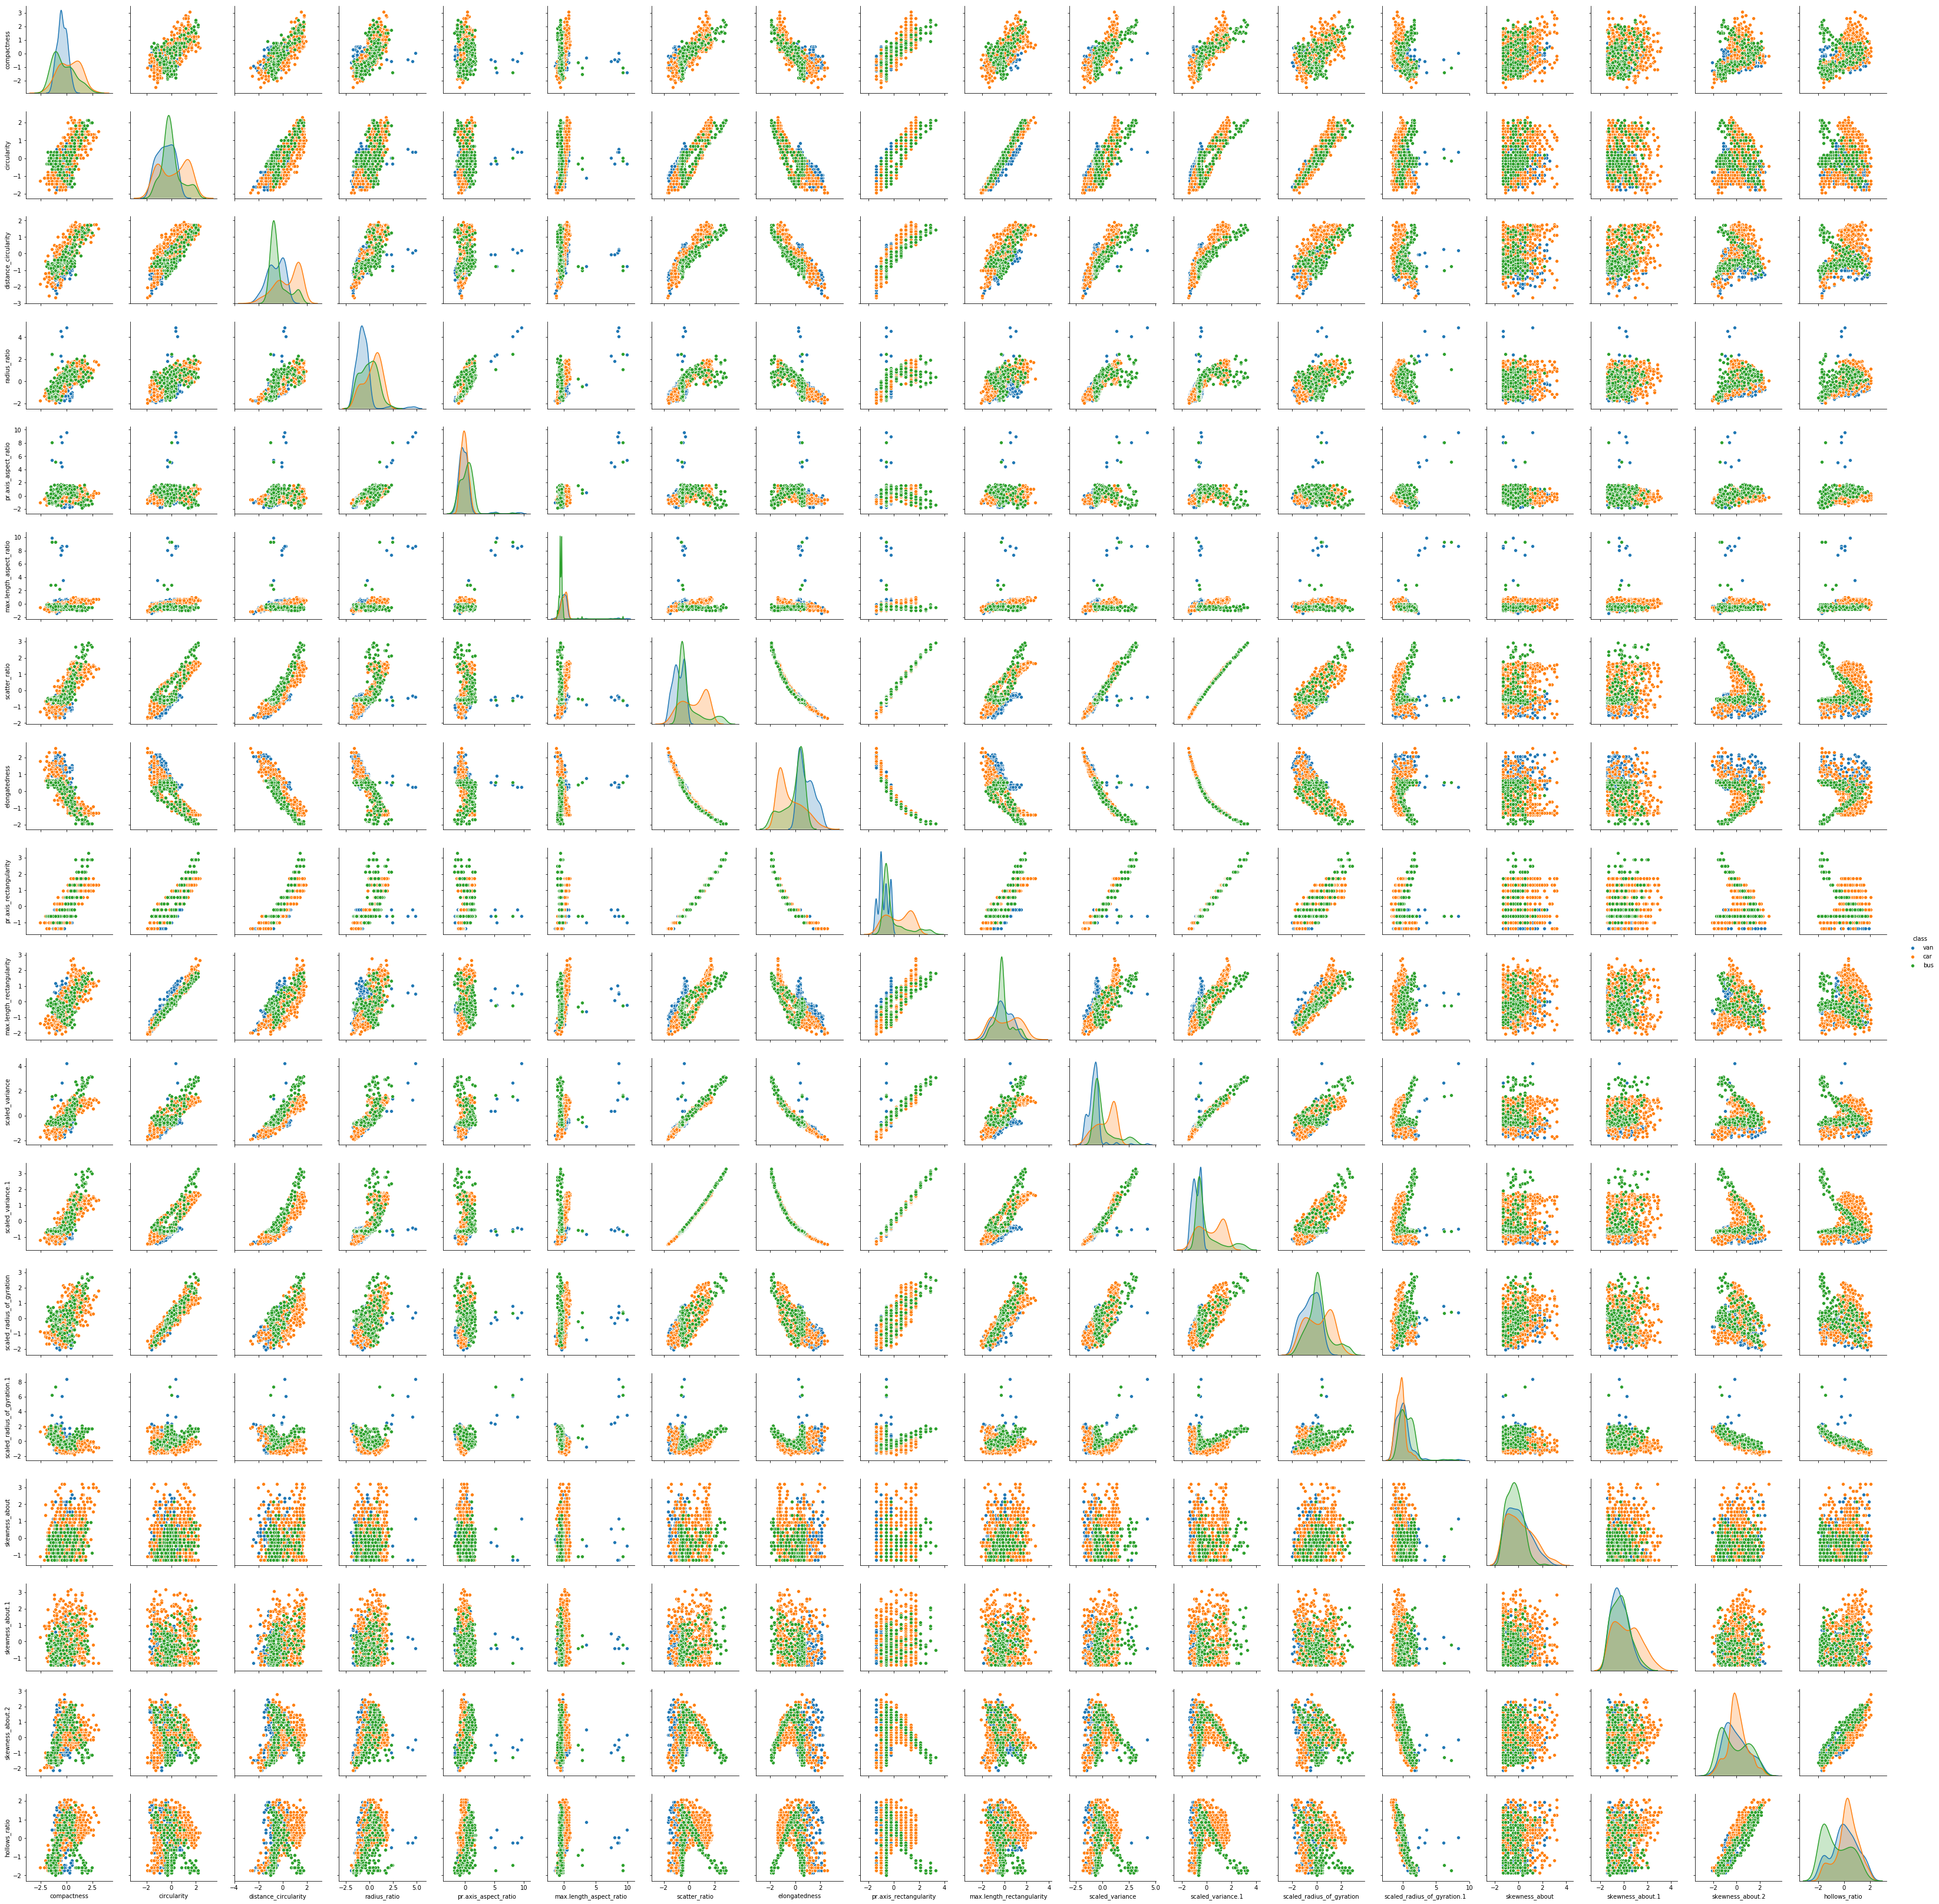

In [157]:
sb.pairplot(vehicles_df,diag_kind='kde',hue='class')

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

In [173]:
no_of_clusters = range(2,11)
cluster_error = []
for each_cluster in no_of_clusters:
    clusters = KMeans(each_cluster,n_init=5)
    clusters.fit(vehicles_df.iloc[:,0:18])
    cluster_error.append(clusters.inertia_)

cluster_df = pd.DataFrame({"cluster_number":no_of_clusters,"cluster_error":cluster_error})
cluster_df  

,cluster_number,cluster_error
0,2,8623.136976
1,3,7037.287609
2,4,5740.480402
3,5,5191.003988
4,6,4712.211023
5,7,4355.139334
6,8,4145.560938
7,9,3878.828889
8,10,3682.333605


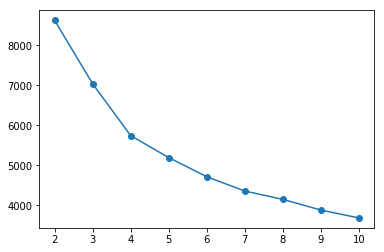

In [174]:
#plt.figure(figsize=(12,6))
plt.plot( cluster_df.cluster_number, cluster_df.cluster_error, marker = "o" )

### Find out the optimal value of K

In the elbow plot above, the bent is observed when number of clusters = 4.
Hence optimal value of K = 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [175]:
cluster = KMeans(4,n_init=5)
cluster.fit(vehicles_df.iloc[:,0:18])
cluster_centers = cluster.cluster_centers_
cluster_centers

array([[-2.25338256e-01, -5.74342724e-01, -3.07614353e-01,
        -3.81865644e-02,  1.81774089e-01, -1.72461386e-01,
        -4.55562374e-01,  3.20123317e-01, -4.83943612e-01,
        -5.36605811e-01, -4.20567716e-01, -4.60232777e-01,
        -6.03827964e-01, -6.44323227e-01, -6.09955778e-02,
         4.54841126e-03,  8.24841721e-01,  7.07985111e-01],
       [ 1.15442786e+00,  1.18428647e+00,  1.21198691e+00,
         9.73321772e-01,  9.49213388e-02,  2.18659142e-01,
         1.29796844e+00, -1.21424667e+00,  1.30184458e+00,
         1.09830595e+00,  1.20590258e+00,  1.30898668e+00,
         1.09121291e+00, -1.07878646e-01,  1.68326262e-01,
         2.67954844e-01,  4.67043879e-03,  1.90327006e-01],
       [-7.33024343e-01,  7.27349604e-02, -2.72170954e-01,
         2.94768327e+00,  6.83665190e+00,  8.69670551e+00,
        -5.35008001e-01,  4.66247771e-01, -5.57405972e-01,
         2.83410527e-01,  1.69752769e+00, -5.88068272e-01,
         2.12700856e-01,  4.96563826e+00, -2.74839440e

<BarContainer object of 4 artists>

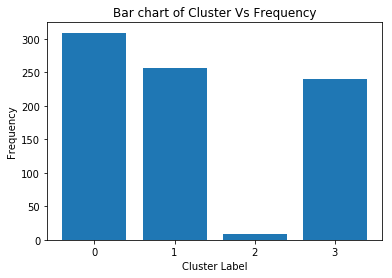

In [212]:
label_array=np.unique(cluster.labels_, return_counts=True)
plt.title("Bar chart of Cluster Vs Frequency")
plt.xticks(label_array[0])
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.bar(x=label_array[0],height=label_array[1])

The above bar chart shows that major clusters are 3 (0,1 and 3)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 5. Store the centroids in a dataframe with column names from the original dataset given 

In [196]:
cluster_df = pd.DataFrame(cluster_centers,columns=vehicles_df.iloc[:,0:18].columns)
cluster_df.insert(column="Cluster_label",value=np.unique(cluster.labels_),loc=18)
cluster_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,Cluster_label
0,-0.225338,-0.574343,-0.307614,-0.038187,0.181774,-0.172461,-0.455562,0.320123,-0.483944,-0.536606,-0.420568,-0.460233,-0.603828,-0.644323,-0.060996,0.004548,0.824842,0.707985,0
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327,1
2,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651,2
3,-0.916833,-0.526197,-0.887660,-1.087301,-0.563172,-0.301083,-0.780130,0.867496,-0.746977,-0.490093,-0.801399,-0.784100,-0.393622,0.779115,-0.091855,-0.283968,-1.043366,-1.099425,3


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [198]:
cluster.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 3, 3, 0, 0, 1,
       0, 3, 1, 1, 3, 0, 0, 0, 1, 0, 3, 2, 1, 3, 1, 3, 3, 0, 1, 3, 3, 3,
       3, 0, 3, 0, 1, 0, 1, 0, 0, 3, 1, 3, 1, 3, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 3, 0, 1, 0, 3, 3, 1, 0, 3, 0, 1, 0, 3, 0, 3, 1, 0, 1, 0, 3, 1,
       3, 3, 1, 3, 2, 0, 0, 3, 1, 1, 3, 3, 1, 0, 0, 3, 3, 3, 0, 1, 1, 0,
       3, 3, 0, 3, 3, 3, 3, 3, 0, 1, 1, 0, 0, 3, 1, 2, 3, 0, 3, 0, 0, 1,
       3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 3, 0, 3, 1, 0, 0, 1, 1,
       0, 1, 3, 3, 1, 1, 0, 1, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 3, 1, 3, 3, 3, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0,
       1, 3, 3, 1, 3, 0, 1, 3, 3, 3, 0, 1, 0, 1, 3, 3, 3, 3, 1, 0, 3, 0,
       1, 3, 0, 0, 3, 1, 3, 3, 0, 0, 1, 3, 1, 3, 0, 0, 1, 0, 0, 1, 1, 3,
       0, 0, 0, 1, 3, 0, 0, 3, 3, 0, 0, 1, 0, 3, 3, 1, 0, 0, 3, 3, 1, 3,
       0, 1, 3, 0, 2, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 1,
       1, 3, 0, 1, 3, 3, 3, 0, 3, 1, 1, 3, 1, 0, 3,

## Hierarchical Clustering 

### 6. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [199]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [253]:
print(a.shape)
print(b.shape)
print(c.shape)
d=np.concatenate((a,b,c),axis=0)
print(d.shape)

(100, 2)
(50, 2)
(100, 2)
(250, 2)


### 7. Combine all three arrays a,b,c into a dataframe

In [254]:
d_df=pd.DataFrame(d,columns=['a','b'])

In [256]:
d_df.shape

(250, 2)

### 8. Use scatter matrix to print all the 3 distributions

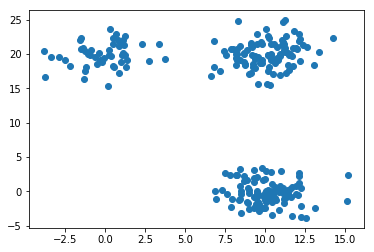

In [261]:
plt.scatter(x=d_df['a'],y=d_df['b'])

### 9. Find out the linkage matrix

In [264]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

Use ward as linkage metric and distance as Eucledian

In [265]:
model.fit(d_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [267]:
Z = linkage(d_df, 'ward')
Z

array([[1.64000000e+02, 1.96000000e+02, 4.44675915e-02, 2.00000000e+00],
       [6.00000000e+01, 9.40000000e+01, 5.79756864e-02, 2.00000000e+00],
       [1.63000000e+02, 1.90000000e+02, 6.67716307e-02, 2.00000000e+00],
       [3.90000000e+01, 5.50000000e+01, 7.95325767e-02, 2.00000000e+00],
       [5.40000000e+01, 8.10000000e+01, 8.11880242e-02, 2.00000000e+00],
       [1.70000000e+01, 3.60000000e+01, 8.83219006e-02, 2.00000000e+00],
       [1.00000000e+01, 2.20000000e+01, 8.99863414e-02, 2.00000000e+00],
       [2.34000000e+02, 2.40000000e+02, 9.60692177e-02, 2.00000000e+00],
       [7.30000000e+01, 7.40000000e+01, 1.03105326e-01, 2.00000000e+00],
       [1.71000000e+02, 1.74000000e+02, 1.08628646e-01, 2.00000000e+00],
       [1.11000000e+02, 1.14000000e+02, 1.15715157e-01, 2.00000000e+00],
       [2.15000000e+02, 2.37000000e+02, 1.31953196e-01, 2.00000000e+00],
       [1.65000000e+02, 1.80000000e+02, 1.32316574e-01, 2.00000000e+00],
       [1.61000000e+02, 2.05000000e+02, 1.36597852e

### 10. Plot the dendrogram for the consolidated dataframe

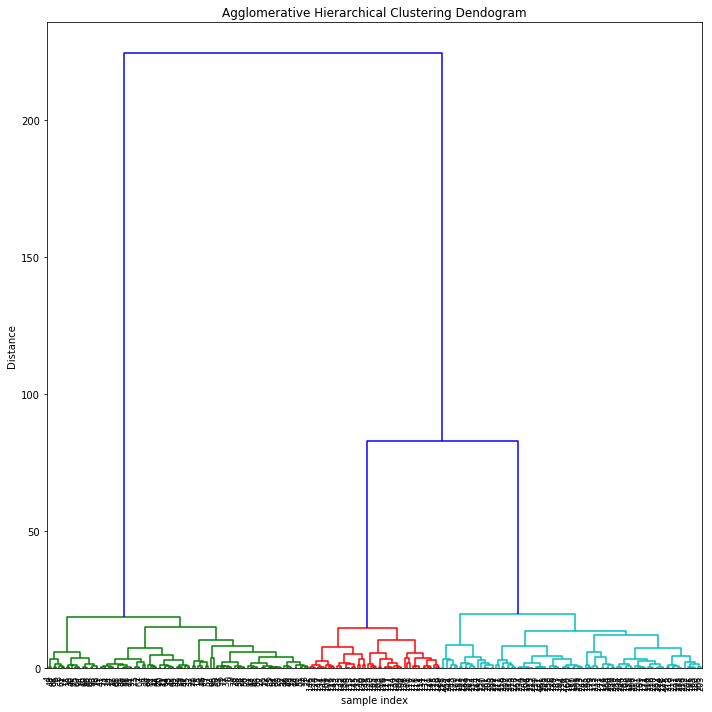

In [268]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 11. Recreate the dendrogram for last 3 merged clusters 

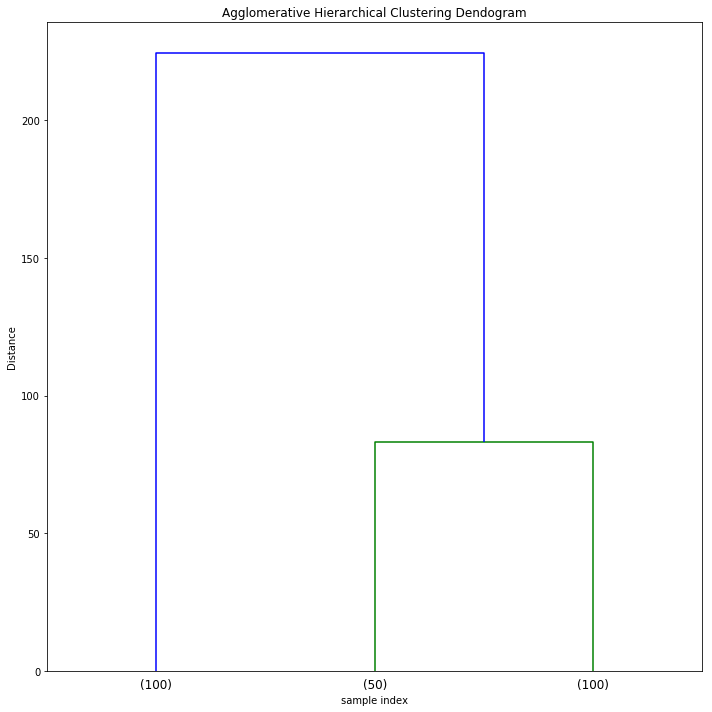

In [274]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,truncate_mode='lastp',p=3)
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 12. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

Ans - From the truncated dendogram the optimale distance value is 83

### 13. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [325]:
l=fcluster(Z,83,criterion='distance')

In [326]:
np.unique(l,return_counts=True)

(array([1, 2, 3], dtype=int32), array([100,  50, 100], dtype=int64))

### Use matplotlib to visually observe the clusters in 2D space 

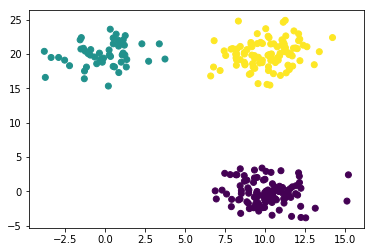

In [328]:
plt.scatter(x=d_df['a'],y=d_df['b'],c=l)